In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
pip install --upgrade requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
tf.__version__

'2.10.0'

In [4]:
a = tf.random.uniform([2,3],0,1)
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.3877008 , 0.15442336, 0.548645  ],
       [0.64156723, 0.95514464, 0.75631654]], dtype=float32)>

In [5]:
# 딥러닝 데이터를 테서(tensor) 자료구조로 표현, 신경망의 가중치도 텐서
# 다차원배열을 --> 텐서
# MNIST 원소하나 28 x 28  2차원 텐서
# MNIST -- 60,000  x 28 x 28  3차원 텐서
# 동영상 --> 4차원 텐서
# 인간의 한계로 인해서 5차원 텐서까지만 사용

In [6]:
# 텐서가 제공하는 데이터셋의 텐서 구조를 확인

In [7]:
import tensorflow.keras.datasets as ds

In [8]:
(x_train,y_train),(x_test,y_test) =  ds.mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
# one - hot
from sklearn.preprocessing import OneHotEncoder
ohe =  OneHotEncoder()
y_train_sk = ohe.fit_transform(y_train.reshape(-1,1))
y_train_tf =  tf.one_hot(y_train,10,dtype=tf.int8)

import pandas as pd
y_train_pd =  pd.get_dummies(y_train)

In [10]:
# y_train_sk.toarray().astype('int8')  # sklearn
# y_train_tf
y_train_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [11]:
# OR 데이터  
x = [
    [0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]
]
y = [
    [-1],[1],[1],[1]
]

In [12]:
import numpy as np
# 신경망 기초 그림 4-10 (b)의 구조를 텐서로 구현
# 퍼셉트론의 가중치와 바이어를 초기화
# 텐서는 넘파이와 완벽하게 호환... 데이터를 구성할때 Variable 대신에 numpy array 사용해도 무관
# w = tf.Variable([[1.0],[1.0]])
# b = tf.Variable(-0.5)
w = np.array([[1.0],[1.0]])
b = np.array(-0.5)

In [13]:
# 퍼셉트론 동작
s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>

In [14]:
# 퍼셉트론 학습
# 데이터는 위에 만든 x y 를 사용
# 가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))

In [15]:
# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [16]:
# 전방계산식
def forward():
    s = tf.add(tf.matmul(x,w),b)
    o = tf.tanh(s)
    return o

In [17]:
# 손실함수(오차계산)   mse
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)  

In [18]:
# 500 세대까지 학습(100세대 마다 정보를 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100 == 0): print(f"loss at epoch : {i} = {loss().numpy()}")

loss at epoch : 0 = 0.6874379515647888
loss at epoch : 100 = 0.08925285935401917
loss at epoch : 200 = 0.041697632521390915
loss at epoch : 300 = 0.026337727904319763
loss at epoch : 400 = 0.019014548510313034


In [19]:
# 학습된 데이터를 OR 데이터로 예측
o = forward()
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.81674933],
       [ 0.8866756 ],
       [ 0.88657665],
       [ 0.99927175]], dtype=float32)>

In [20]:
# 케라스를 이용한 퍼셉트론 학습
# 데이터는 or 데이터를 사용
# 신경망 구조를 설계
# 신경망 학습
# 예측

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [21]:
# x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
# y = [[-1], [1], [1], [1]]
x,y

([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], [[-1], [1], [1], [1]])

In [22]:
# 신경망 구조 설계
n_input = 2
n_output = 1
perceptron = Sequential()
perceptron.add(Dense(n_output,activation='tanh',input_shape=(n_input,)
                     ,kernel_initializer='random_uniform'))

In [23]:
# 신경망 학습  compile, fit
perceptron.compile(loss='mse', optimizer = SGD(learning_rate=0.1), metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

Epoch 1/500
1/1 - 0s - loss: 0.9790 - mse: 0.9790 - 239ms/epoch - 239ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7386 - mse: 0.7386 - 6ms/epoch - 6ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6336 - mse: 0.6336 - 6ms/epoch - 6ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5817 - mse: 0.5817 - 5ms/epoch - 5ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5500 - mse: 0.5500 - 7ms/epoch - 7ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5271 - mse: 0.5271 - 6ms/epoch - 6ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5086 - mse: 0.5086 - 6ms/epoch - 6ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4925 - mse: 0.4925 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4779 - mse: 0.4779 - 6ms/epoch - 6ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4642 - mse: 0.4642 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4512 - mse: 0.4512 - 6ms/epoch - 6ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4389 - mse: 0.4389 - 5ms/epoch - 5ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4270 - mse: 0.4270 - 6ms/epoch - 6ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4155 - mse:

In [24]:
predict =  perceptron.predict(x)
predict

1/1 [==============================] - 0s 79ms/step


array([[-0.81625974],
       [ 0.88633335],
       [ 0.88632816],
       [ 0.9992657 ]], dtype=float32)

In [25]:
# 텐서를 이용한 학습
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.81674933],
       [ 0.8866756 ],
       [ 0.88657665],
       [ 0.99927175]], dtype=float32)>

In [26]:
# 다층 퍼셉트론(신경망 Dens가 2개이상) 으로 MNIST 인식
# 단일 퍼셉트론(신경망 Dense 한개)

In [27]:
# 신경망 설계, 학습, 예측.
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [28]:
# mnist에서 읽어와서 신경망 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 텐서모양을 2차원 텐서
x_train.shape  # (60000, 28, 28)
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# 표준화 - narray 변경
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
# loss 함수의 선택여부에 따라서 ont-hot -- categor......
# 변경하지 않음 spare.........

In [29]:
# 신경망 구조 설계  밀집층 2개 구조
# 파이퍼 파라메터...
n_input = 28*28
n_hidden = 1024
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='tanh', input_shape = (n_input,)
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error' , optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [30]:
hist = mlp.fit(x_train,y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),
        verbose=2)

Epoch 1/30
469/469 - 3s - loss: 0.0423 - accuracy: 0.8466 - val_loss: 0.0268 - val_accuracy: 0.9156 - 3s/epoch - 6ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0223 - accuracy: 0.9294 - val_loss: 0.0179 - val_accuracy: 0.9431 - 3s/epoch - 5ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0164 - accuracy: 0.9480 - val_loss: 0.0160 - val_accuracy: 0.9527 - 2s/epoch - 5ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0136 - accuracy: 0.9573 - val_loss: 0.0128 - val_accuracy: 0.9588 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0119 - accuracy: 0.9642 - val_loss: 0.0115 - val_accuracy: 0.9634 - 2s/epoch - 5ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0107 - accuracy: 0.9681 - val_loss: 0.0109 - val_accuracy: 0.9661 - 3s/epoch - 6ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0100 - accuracy: 0.9714 - val_loss: 0.0105 - val_accuracy: 0.9673 - 3s/epoch - 6ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0093 - accuracy: 0.9742 - val_loss: 0.0097 - val_accuracy: 0.9689 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 2s 

In [31]:
# 학습곡선 시각화 - epoch를 늘리면 추가 개선사항이 있는지와 과적합여부 및 최적의 epoch수를 찾기
import matplotlib.pyplot as plt

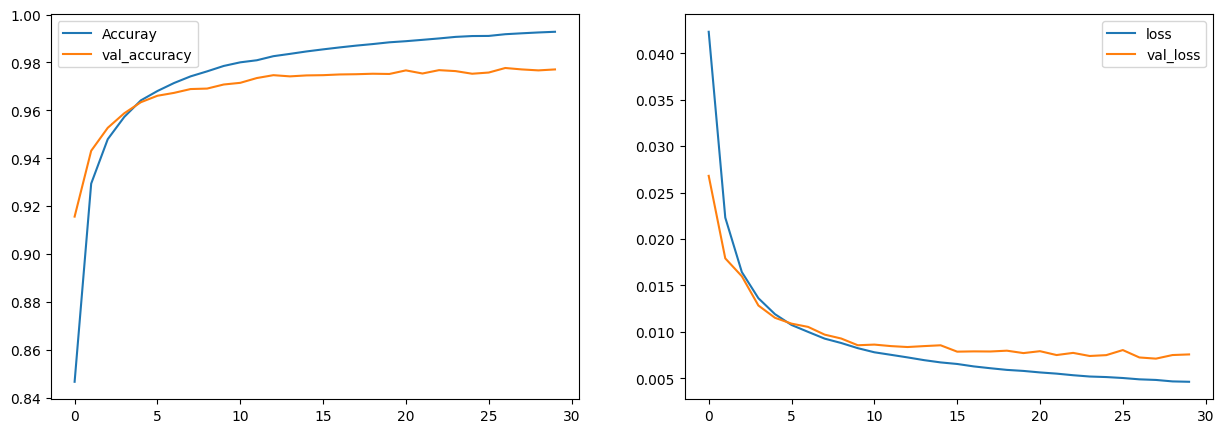

In [32]:
# 정확률
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label = 'Accuray')
ax1.plot(hist.history['val_accuracy'], label = 'val_accuracy')
ax1.legend()
# 손실률
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'], label = 'val_loss')
ax2.legend()
plt.show()

In [33]:
mlp.evaluate(x_train,y_train) , mlp.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.9771


([0.004588596988469362, 0.9937999844551086],
 [0.007571679074317217, 0.9771000146865845])

In [34]:
# fashion mnist로 확장을 해서 신경망 구성하고 학습하고 학습곡선
# 텐서 확인하고 작업

In [35]:
# fashion mnist
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [36]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# 텐서모양을 2차원텐서로 변경
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [38]:
# 신경망 구조 설계  밀집층 2개 구조
# 파이퍼 파라메터...
n_input = 28*28
n_hidden = 1024
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='tanh', input_shape = (n_input,)
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error' , optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

hist = mlp.fit(x_train,y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),
        verbose=2)

Epoch 1/30
469/469 - 3s - loss: 0.1121 - accuracy: 0.3103 - val_loss: 0.0333 - val_accuracy: 0.8220 - 3s/epoch - 6ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0303 - accuracy: 0.8453 - val_loss: 0.0287 - val_accuracy: 0.8395 - 2s/epoch - 5ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0271 - accuracy: 0.8580 - val_loss: 0.0274 - val_accuracy: 0.8529 - 3s/epoch - 5ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0251 - accuracy: 0.8682 - val_loss: 0.0269 - val_accuracy: 0.8518 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0236 - accuracy: 0.8755 - val_loss: 0.0251 - val_accuracy: 0.8613 - 3s/epoch - 5ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0224 - accuracy: 0.8819 - val_loss: 0.0242 - val_accuracy: 0.8649 - 3s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0215 - accuracy: 0.8863 - val_loss: 0.0234 - val_accuracy: 0.8698 - 2s/epoch - 5ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0207 - accuracy: 0.8910 - val_loss: 0.0226 - val_accuracy: 0.8735 - 3s/epoch - 7ms/step
Epoch 9/30
469/469 - 3s 

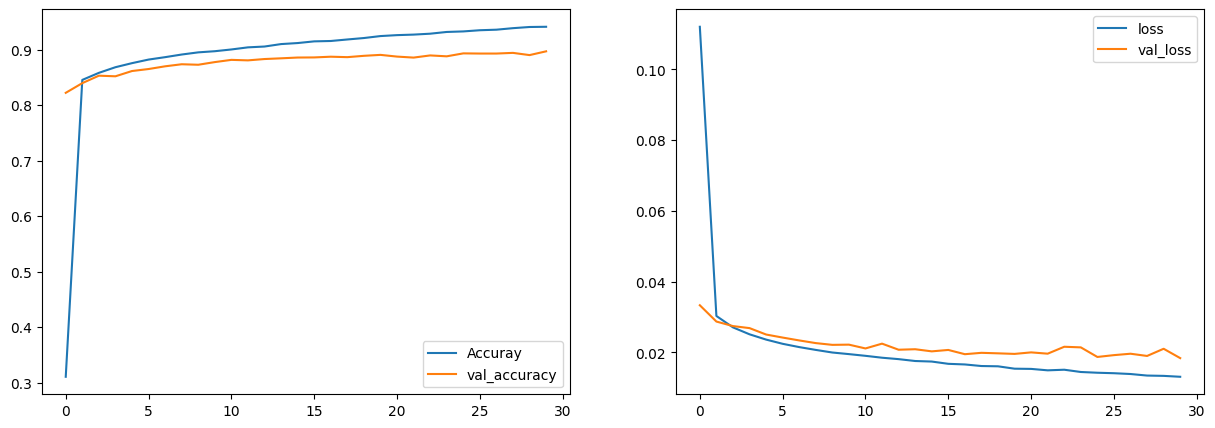

In [39]:
# 학습곡선 시각화 - epoch를 늘리면 추가 개선사항이 있는지와 과적합여부 및 최적의 epoch수를 찾기
import matplotlib.pyplot as plt
# 정확률
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label = 'Accuray')
ax1.plot(hist.history['val_accuracy'], label = 'val_accuracy')
ax1.legend()
# 손실률
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'], label = 'val_loss')
ax2.legend()
plt.show()

In [ ]:
# L층   은닉층 L-1개  양 끝단을 입력과 출력
# L=5  
# 이미지 특징 : 화소수  28*28 784  c = 10
# 모든 은닉층의 뉴런의 개수가 500개라면
# 입력층과 은닉층 한개를 (784+1)x500 --> 가중치
# 은닉층과 출력층을 연결하는 가중치 (500+1) x 10
# 1,149,010  총 가중치
# 계산은 GPU, 과적합은 규제 알고리즘을 적용
# 전방계산 -> 오차계산 -> 가중치를 업데이트(전방계산의 반대 방향):오류역전파

In [40]:
# 층이 5개인 신경망을 구성-- 위에서 만든 mlp를 이용해서 dense 늘려서구현

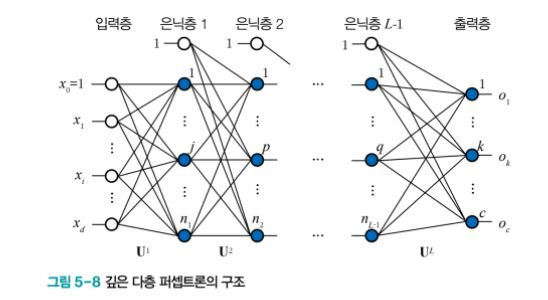

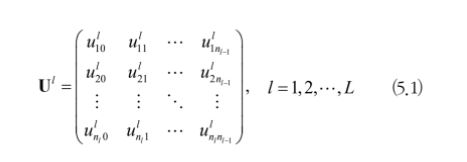

In [ ]:
# 입력층으로 들어오는 특징 벡터를 신경망이 사용하는 내부 표현으로 바꿘 쓴것임  n0 는 입력층의 노드수 d와 같음

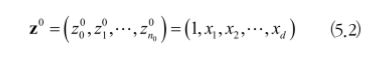

In [ ]:
# l번째 은닉층의 j번째 노드연산 (노드 하나의 연산)
# T는 활성함수

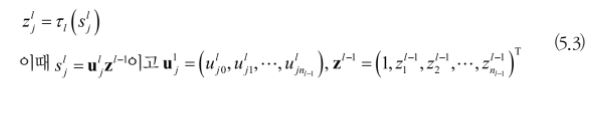

In [ ]:
# 위의 노드 하나의 연산을 행렬연산으로 사용하면 하나의 식으로 같은 측에 있는 모든 노드의 연산을 표현할수 있음
# i번째 층이 수행하는 연산

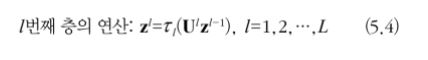

In [ ]:
# 이전에 본 퍼셉트론 식을 깊은 다층 퍼셉트론으로 확장  T는 활성 함수
# L 층(은닉층) 주로  tanh, 로지스틱 시그모읻, softmax함수를 사용
# 소프트맥스는 노드의 출력을 모두 더하면 1이되는 특징을 가지고 있어....--> 활률로 갖주하가 쉽다
# 딥러닝은 주로 softmax를 사용(분류)

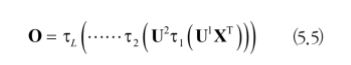

In [ ]:
# 다층퍼셉트론의 알고리즘을 조금확장, mlp 손실함수 4.19를 확장하면  깊은 다층 퍼셉트론의 손실함수를 얻을수 있음

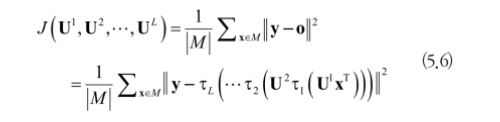

In [ ]:
# 가중치 갱신 4.20을 확장한 식
# 특징벡터를 입력층에 입력-->전방계산 ->오차(예측값과 - 실제값) 오차에따라서 Ul UL-1  UL-2.....u1순으로 가중치를갱신

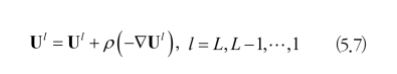

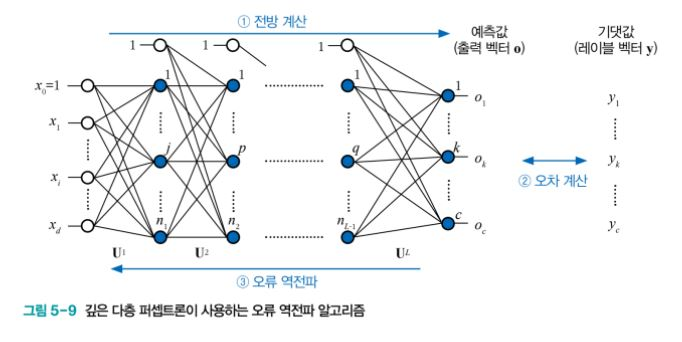

In [41]:
# L=5

In [42]:
# fashion mnist
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train.shape,y_train.shape

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# 텐서모양을 2차원텐서로 변경
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [45]:
# 신경망 구조
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [46]:
# 신경망 구조 설계
# deep multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden1, activation='tanh', input_shape = (n_input,)
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_hidden2,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_hidden3,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_hidden4,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='tanh'
              ,kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error' , optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

hist = mlp.fit(x_train,y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),
        verbose=2)

Epoch 1/30
469/469 - 5s - loss: 0.0346 - accuracy: 0.8126 - val_loss: 0.0256 - val_accuracy: 0.8431 - 5s/epoch - 11ms/step
Epoch 2/30


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_5/dense_9/MatMul' defined at (most recent call last):
    File "C:\Users\user\miniconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\user\miniconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\user\miniconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\user\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\user\miniconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\user\miniconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\user\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\user\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\user\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_21184\1202426558.py", line 16, in <cell line: 16>
      hist = mlp.fit(x_train,y_train, batch_size=128,epochs=30,validation_data=(x_test,y_test),
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\miniconda3\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential_5/dense_9/MatMul'
OOM when allocating tensor with shape[128,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_5/dense_9/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_169342]

In [ ]:
# 학습곡선 시각화 - epoch를 늘리면 추가 개선사항이 있는지와 과적합여부 및 최적의 epoch수를 찾기
import matplotlib.pyplot as plt
# 정확률
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label = 'Accuray')
ax1.plot(hist.history['val_accuracy'], label = 'val_accuracy')
ax1.legend()
# 손실률
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'], label = 'val_loss')
ax2.legend()
plt.show()

In [47]:
# 동일조건에서는 깊은 다층 퍼셉트론이 우수한 성능을 보인다.

In [48]:
# glorot_uniform --> Glorot2010 논문 -> 텐서플로계열에서 이걸 알고리즘으로 구현해서 제공

In [49]:
# glorot_uniform 방식이 random_uniform으로 생성한 가중치 초기화 값보다 성능이 우수..... 앞으로는 생략해서 사용

In [50]:
# 그레이디언트 소멸 문제
# 깊이가 10이고 모든 층의 그레이디언트가 0.01라고 하면 층을 지날때마다 0.01 x 0.01 x 0.01 x 0.01 == 0.0000000 ...1 
# 층이 깊어질수록 가중치 갱신이 일어나지 않거나.. 학습이 매우느려져서.. 학습을 계속해도 .....
# 해결..  병렬로 gpu를 사용 코렙.. 병렬.. TPU를 제공

In [51]:
# 식 5.3 에서 s에 활성함수 T를 적용할때.. T 가 시그모이드면 s의 값이 클때 그레이디언트는 아주 작다.
# 대략 s가 5보다 크면.. 0에 가깝고 
# tanh 시그모이드 s = 8이면 그레이디언트는 0.0000000 ~~
# 그레이디언트 소멸문제를 해결... ReLu 함수  s가 양수일때 1이고 음수일때는 0  -> 소멸가능성이 낮고.. -> 활성화 함수에서 Relu를 사용

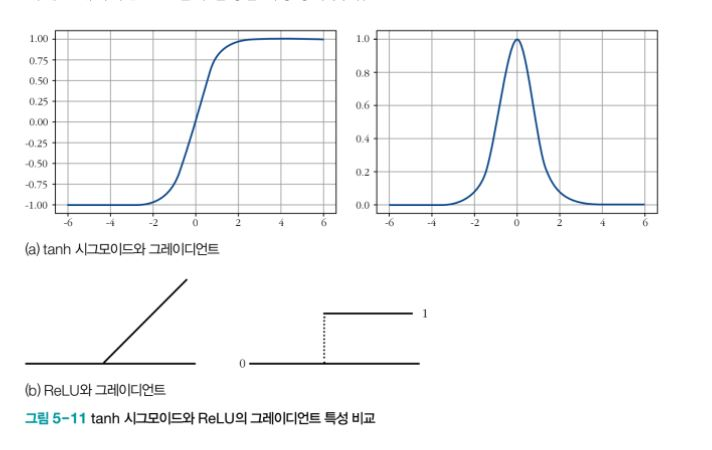